In [1]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt
import RS_indexes as index 

In [13]:
# 📂 File paths to the Sentinel-2 bands (Update these paths to your own file locations)
band_blue_path = 'D:/sentinel2data/data/2024-12-05-00_00_2024-12-05-23_59_Sentinel-2_L2A_B02_(Raw).tiff' # Band 2 (Blue)
band_green_path = 'D:/sentinel2data/data/2024-12-05-00_00_2024-12-05-23_59_Sentinel-2_L2A_B03_(Raw).tiff' # Band 3 (Green)
band_red_path = 'D:/sentinel2data/data/2024-12-05-00_00_2024-12-05-23_59_Sentinel-2_L2A_B04_(Raw).tiff' # Band 4 (RED)
band_nir_path = 'D:/sentinel2data/data/2024-12-05-00_00_2024-12-05-23_59_Sentinel-2_L2A_B08_(Raw).tiff' # Band 8 (NIR)
band_swir1_path = 'D:/sentinel2data/data/2024-12-05-00_00_2024-12-05-23_59_Sentinel-2_L2A_B11_(Raw).tiff' # Band 11 (SWIR1)
band_swir2_path = 'D:/sentinel2data/data/2024-12-05-00_00_2024-12-05-23_59_Sentinel-2_L2A_B12_(Raw).tiff' # Band 11 (SWIR1)

In [14]:
# 🚀 Load all the required bands using the RS_indexes library's load_band method
print("Loading bands...")
blue = index.load_band(band_blue_path, 1)   # Band 2
green = index.load_band(band_green_path, 1)  # Band 3
red = index.load_band(band_red_path, 1)      # Band 4
nir = index.load_band(band_nir_path, 1)      # Band 8
swir1 = index.load_band(band_swir1_path, 1)  # Band 11
swir2 = index.load_band(band_swir2_path, 1)  # Band 12
print("All bands loaded successfully!")

Loading bands...
All bands loaded successfully!


In [18]:
# 🎉 Normalize the 16-bit images to [0, 1]
def normalize_band(band):
    """Normalize a 16-bit image to [0, 1]."""
    band = band.astype(np.float32)  # Convert to float
    return band / 65535  # Normalize (16-bit max value is 65535)

# Normalize each band
blue = normalize_band(blue)
green = normalize_band(green)
red = normalize_band(red)
nir = normalize_band(nir)
swir1 = normalize_band(swir1)
swir2 = normalize_band(swir2)

In [19]:
# 🎉 Compute Remote Sensing Indexes using the RS_indexes library
print("Computing NDVI...")
ndvi = index.compute_ndvi(nir, red)
print("Computing EVI...")
ndmi = index.compute_ndmi(nir, swir1)
print("Computing NDWI...")
ndwi = index.compute_ndwi(green, nir)
print("Computing NBR...")
nbr = index.compute_nbr(nir, swir2)

Computing NDVI...
Computing EVI...
Computing NDMI...
Computing NDWI...
Computing NBR...


In [20]:
# 📊 Function to visualize a raster image
def plot_index(index, title, cmap='RdYlGn'):
    """Visualize the RS index as a 2D image."""
    plt.figure(figsize=(10, 6))
    plt.imshow(index, cmap=cmap)
    plt.colorbar(label=title)
    plt.title(title)
    plt.axis('off')  # Hide axes
    plt.show()

Visualizing NDVI...


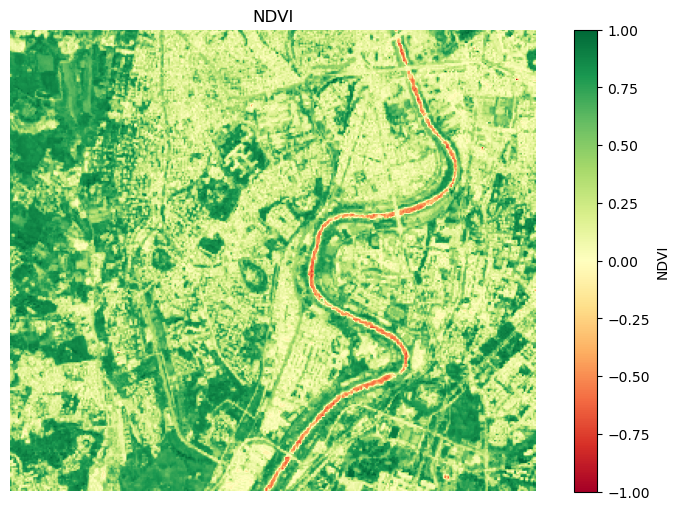

Visualizing NDMI...


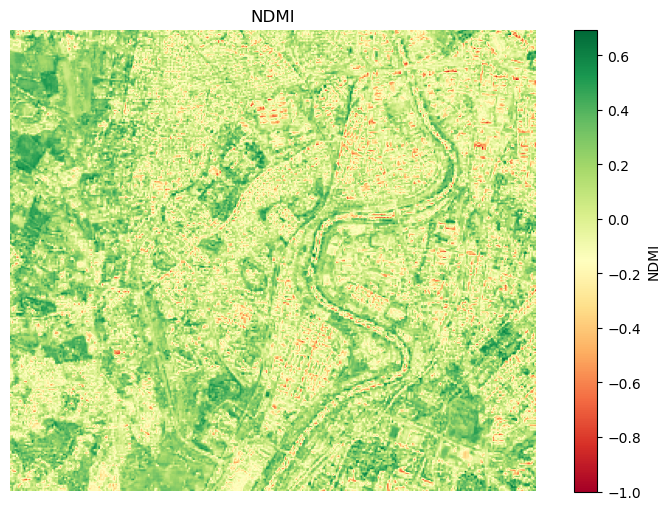

Visualizing NDWI...


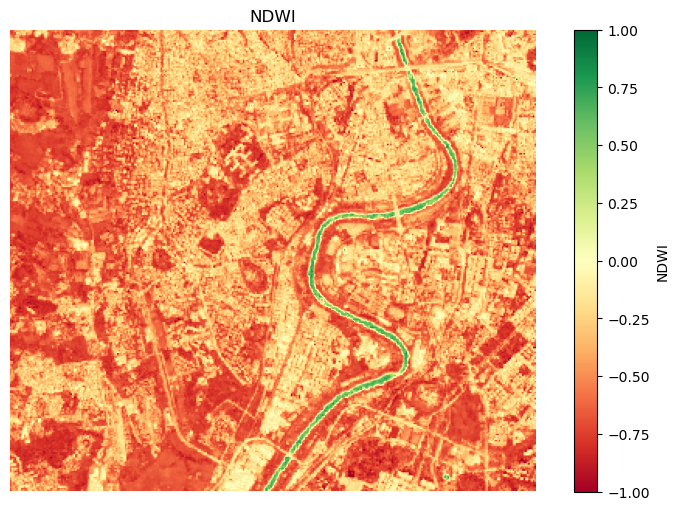

Visualizing NBR...


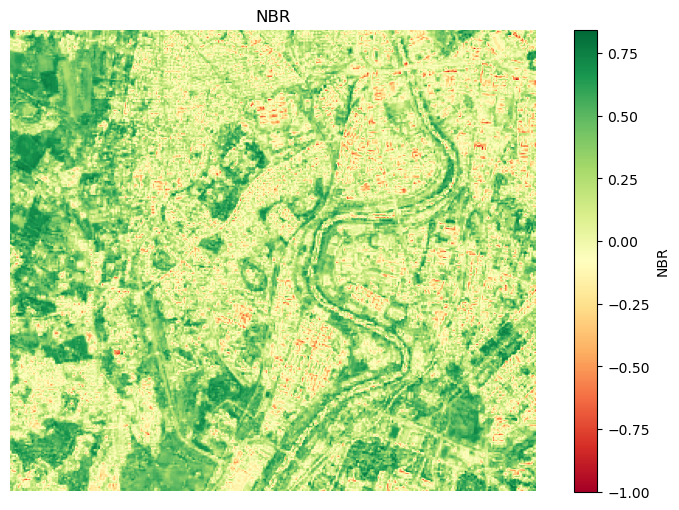

All indexes computed and visualized successfully!


In [22]:
# 🖼️ Visualize the computed indexes
print("Visualizing NDVI...")
plot_index(ndvi, 'NDVI')

print("Visualizing NDMI...")
plot_index(ndmi, 'NDMI')

print("Visualizing NDWI...")
plot_index(ndwi, 'NDWI')

print("Visualizing NBR...")
plot_index(nbr, 'NBR')

print("All indexes computed and visualized successfully!")